# Support Vector Classification

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


### Making Synthetic Dataset

In [27]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=2, n_classes=2, n_clusters_per_class=2,n_redundant=0)

In [28]:
pd.DataFrame(X)[0]

0       1.748348
1      -1.258341
2       0.162451
3       0.095177
4      -0.801833
          ...   
9995   -1.394081
9996   -0.293449
9997   -2.087330
9998    0.824159
9999    3.301463
Name: 0, Length: 10000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

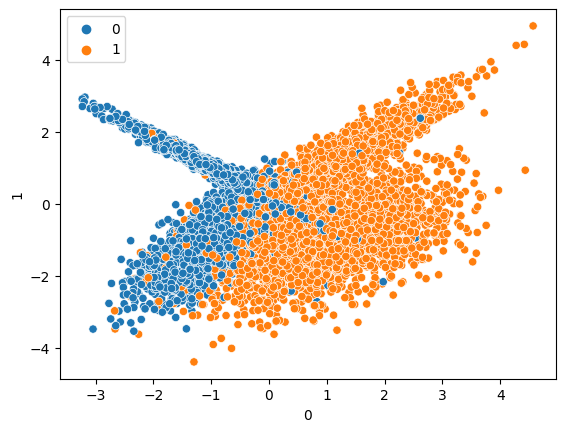

In [29]:
sns.scatterplot(x=pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue=y)

## Splitting Dataset

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

## Training the model 

In [31]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [32]:
svc.coef_

array([[ 2.20500123, -0.63417935]])

### Prediction by the model

In [33]:
y_pred = svc.predict(X_test)

### Checking the Accuracy

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy Score: ", accuracy_score(y_pred,y_test))
print("Confusion matric: ", confusion_matrix(y_pred, y_test))
print("Classification Report: ", classification_report(y_pred, y_test))

Accuracy Score:  0.9088
Confusion matric:  [[1177  150]
 [  78 1095]]
Classification Report:                precision    recall  f1-score   support

           0       0.94      0.89      0.91      1327
           1       0.88      0.93      0.91      1173

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



## Hyperparameter Tuning 

In [47]:
from sklearn.model_selection import GridSearchCV
parameters={
    "C":[0.01,0.1, 1],
    "gamma":['scale', 'auto'],
    "kernel": ["linear"]
}

grid = GridSearchCV(SVC(), param_grid=parameters, cv = 5, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END C=0.01, gamma=scale, kernel=linear;, score=0.908 total time=   0.3s
[CV 2/5] END C=0.01, gamma=scale, kernel=linear;, score=0.905 total time=   0.2s
[CV 3/5] END C=0.01, gamma=scale, kernel=linear;, score=0.921 total time=   0.3s
[CV 4/5] END C=0.01, gamma=scale, kernel=linear;, score=0.907 total time=   0.5s
[CV 5/5] END C=0.01, gamma=scale, kernel=linear;, score=0.897 total time=   0.3s
[CV 1/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.908 total time=   0.2s
[CV 2/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.905 total time=   0.3s
[CV 3/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.921 total time=   0.3s
[CV 4/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.907 total time=   0.4s
[CV 5/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.897 total time=   0.4s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.907 total time=   0.2s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear']},
             verbose=3)

In [49]:
grid.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

## Retraining The Model

In [50]:
svc = SVC(C=0.1, gamma='scale',kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [51]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9088
[[1177  150]
 [  78 1095]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1327
           1       0.88      0.93      0.91      1173

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



# END